# Measure of central tendencies

## Mean

With a random sample of size `n`:
$$ \bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i $$

## Median

In an ordered dataset such as
> $ x_1 ≤ x_2 ≤ x_3 ≤ ... ≤ x_n $

if `n` is odd:
$$ p = \frac{n + 1}{2} $$
$$ \tilde{x} = x_p $$

If `n` is even:

$$ p = \frac{n}{2} $$
$$ \tilde{x} = \frac{x_p + x_{p+1}}{2} $$

## Mode

If $ X $ is a discrete random variable, the mode is the value $ x $ at which the probability mass function takes its maximum value. 

# Measure of deviation

## Variance

$ \mu $ is the mean:
$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2$$
Can also be written:
$$ \sigma^2 = \mathbb{E}[x_i^2] - \mu^2 $$

## Standard deviation

$$ \sigma = \sqrt{Variance} = \sqrt{\sigma^2} $$

In [4]:
low_standard_deviation = np.array([-3, -2, -1, 0, 1, 2, 3])
high_standard_deviation = low_standard_deviation * 100
print(f"low_standard_deviation {low_standard_deviation}")
print(f"mean: {low_standard_deviation.mean()}")
print(f"variance: {low_standard_deviation.var()}")
print(f"standard deviation: {low_standard_deviation.std()}")
print()
print(f"high_standard_deviation {high_standard_deviation}")
print(f"mean: {high_standard_deviation.mean()}")
print(f"variance: {high_standard_deviation.var()}")
print(f"standard deviation: {high_standard_deviation.std()}")

low_standard_deviation [-3 -2 -1  0  1  2  3]
mean: 0.0
variance: 4.0
standard deviation: 2.0

high_standard_deviation [-300 -200 -100    0  100  200  300]
mean: 0.0
variance: 40000.0
standard deviation: 200.0


## Sample Variance

When working on a sample, one underestimates the variance of the population therefore we compute the unbiased variance instead:
$$ \sigma^2 = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \mu)^2 $$

# Empirical Relationship between Mean, Median, and Mode

### Normal Distribution

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

mean: 3.637978807091713e-15, median: 3.552713678800501e-15


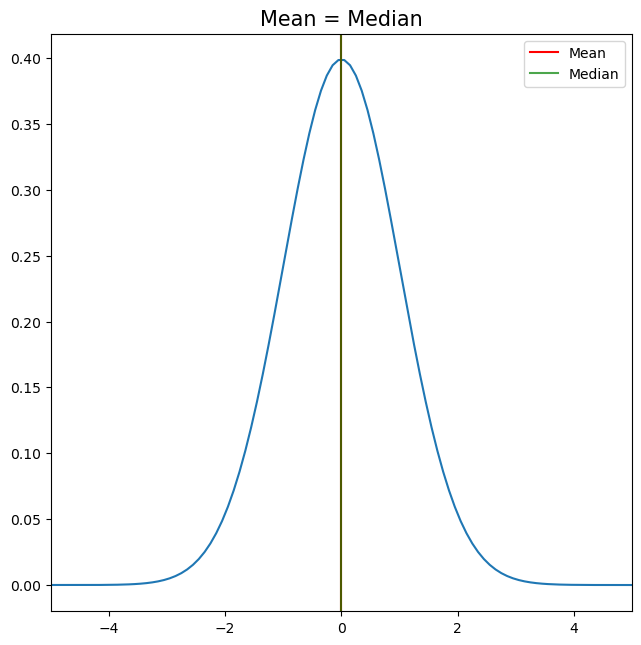

In [5]:
snd = stats.norm(0, 1)
x = np.linspace(-50, 50, 1000)
print(f"mean: {np.mean(x)}, median: {np.median(x)}")
plt.figure(figsize=(7.5,7.5))
plt.plot(x, snd.pdf(x))
plt.xlim(-5, 5)
plt.title('Mean = Median', fontsize='15')
plt.axvline(x=np.mean(x), color='r', label='Mean')
plt.axvline(x=np.median(x), color='g', label='Median', alpha=0.7)
plt.legend()
plt.show()

### Skewed distribution

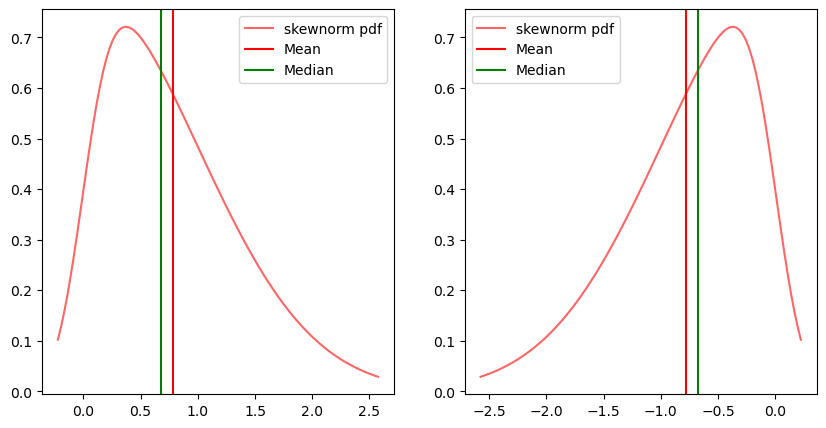

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

a = 5
x = np.linspace(stats.skewnorm.ppf(0.01, a),
                stats.skewnorm.ppf(0.99, a), 100)

b = -5
y =  np.linspace(stats.skewnorm.ppf(0.01, b),
                stats.skewnorm.ppf(0.99, b), 100)

ax1.plot(x, stats.skewnorm.pdf(x, a),
       'r-', alpha=0.6, label='skewnorm pdf')
ax1.axvline(x=stats.skewnorm.mean(a), color='r', label='Mean')
ax1.axvline(x=stats.skewnorm.median(a), color='g', label='Median')
ax1.legend()

ax2.plot(y, stats.skewnorm.pdf(y, b),
       'r-', alpha=0.6, label='skewnorm pdf')
ax2.axvline(x=stats.skewnorm.mean(b), color='r', label='Mean')
ax2.axvline(x=stats.skewnorm.median(b), color='g', label='Median')
ax2.legend()

### Quartile and percentile

[3 1 7 1 5 0 0 6 8 7 2 0 3 1 7 9 5 9 7 7 8 5 9 9 3 2 0 9 6 0]
iqr 5.75 is q3 7.0 - q1 1.25 = 5.75


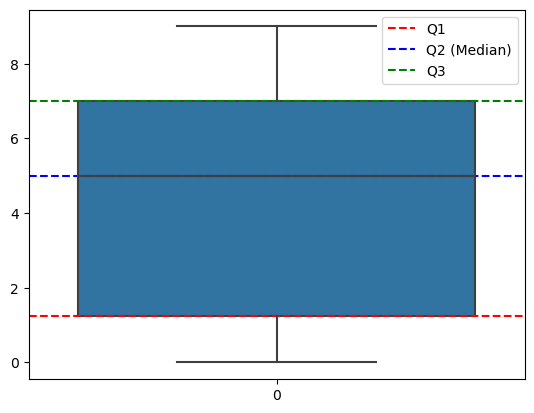

In [41]:
random_array = np.random.randint(0, 10, size=30)
print(random_array)
q1 = np.quantile(random_array, 0.25)
q2 = np.quantile(random_array, 0.50)
q3 = np.quantile(random_array, 0.75)
iqr = stats.iqr(random_array)
print(f"iqr {iqr} is q3 {q3} - q1 {q1} = {q3 - q1}")
plt.axhline(y=q1, color='red', linestyle='--', label='Q1')
plt.axhline(y=q2, color='blue', linestyle='--', label='Q2 (Median)')
plt.axhline(y=q3, color='green', linestyle='--', label='Q3')
sns.boxplot(random_array)
plt.legend()
plt.show()

Outliers are considered to be:
$$ outlier < Q1 - 1.5(IQR) $$ 
and 
$$ outlier > Q3 + 1.5(IQR) $$ 


### Range and mid-range

$$ Range(X) = Max(X) - Min(X) $$
$$ MidRange(X) = \frac{Max(X) + Min(X)}{2} $$


### Mean Absolute Deviation (MAD)

$$ Mean Absolute deviation = {\frac {1}{n}}\sum _{i=1}^{n}|x_{i}-m(X)| $$
$$ Median Absolute Deviation =\operatorname {median} (|X_{i}-{\tilde {X}}|) $$

In [42]:
mean = np.mean(random_array)
mean_abs_deviation = np.mean(np.absolute(random_array - np.mean(random_array)))
median_abs_deviation = stats.median_abs_deviation(random_array)

print(f"mean: {mean}")
print(f"mean standard deviation: {mean_abs_deviation}")
print(f"median standard deviation: {median_abs_deviation}")

mean: 4.633333333333334
mean standard deviation: 2.9488888888888893
median standard deviation: 3.0


### z-score

How many standard deviation away from the mean. Gives you an idea of far from the mean a data point is.
- Positive score is above average, Negative below
- Close to 0 means it's not far from average 

$$ z={x-\mu  \over \sigma } $$

## Normal distribution

Empirical rule:
- +/- $ 1 \sigma $ 68% of the data points
- +/- $ 2 \sigma $ 95% of the data points
- +/- $ 3 \sigma $ 99.7% of the data points

[-50.         -49.8998999  -49.7997998  -49.6996997  -49.5995996
 -49.4994995  -49.3993994  -49.2992993  -49.1991992  -49.0990991
 -48.998999   -48.8988989  -48.7987988  -48.6986987  -48.5985986
 -48.4984985  -48.3983984  -48.2982983  -48.1981982  -48.0980981
 -47.997998   -47.8978979  -47.7977978  -47.6976977  -47.5975976
 -47.4974975  -47.3973974  -47.2972973  -47.1971972  -47.0970971
 -46.996997   -46.8968969  -46.7967968  -46.6966967  -46.5965966
 -46.4964965  -46.3963964  -46.2962963  -46.1961962  -46.0960961
 -45.995996   -45.8958959  -45.7957958  -45.6956957  -45.5955956
 -45.4954955  -45.3953954  -45.2952953  -45.1951952  -45.0950951
 -44.99499499 -44.89489489 -44.79479479 -44.69469469 -44.59459459
 -44.49449449 -44.39439439 -44.29429429 -44.19419419 -44.09409409
 -43.99399399 -43.89389389 -43.79379379 -43.69369369 -43.59359359
 -43.49349349 -43.39339339 -43.29329329 -43.19319319 -43.09309309
 -42.99299299 -42.89289289 -42.79279279 -42.69269269 -42.59259259
 -42.49249249 -42.39

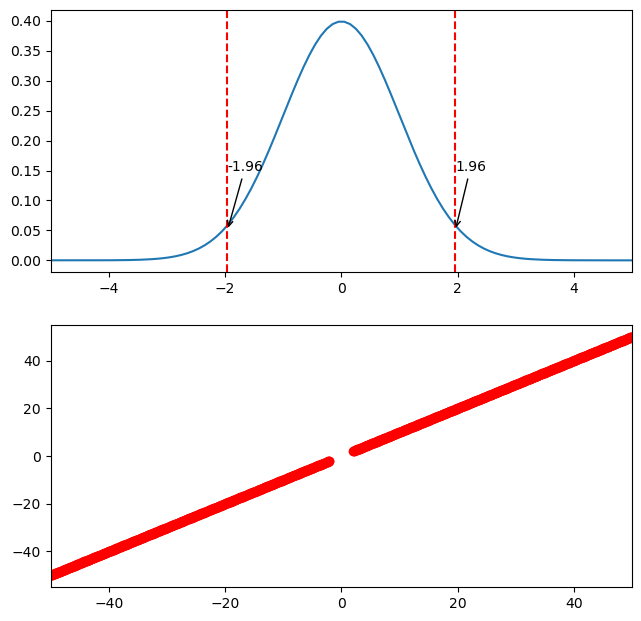

In [79]:
snd = stats.norm(0, 1)
x = np.linspace(-50, 50, 1000)

pdf_values = snd.pdf(x)
print(x)

threshold_above = snd.ppf(0.975)  # Two standard deviations above (97.5% percentile)
threshold_below = snd.ppf(0.025)  # Two standard deviations below (2.5% percentile)

plt.figure(figsize=(7.5,7.5))
plt.subplot(2, 1, 1)

plt.plot(x, pdf_values)
plt.axvline(x=threshold_above, color='r', linestyle='--')
plt.axvline(x=threshold_below, color='r', linestyle='--')
plt.annotate(f'{threshold_above:.2f}', xy=(threshold_above, 0.05), xytext=(threshold_above, 0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'{threshold_below:.2f}', xy=(threshold_below, 0.05), xytext=(threshold_below, 0.15),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlim(-5, 5)

plt.subplot(2, 1, 2)
plt.scatter(x, x)
lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

plt.scatter(x[tail_points], x[tail_points], c='r', label='Extreme Tails')
plt.xlim(-50, 50)
plt.show()

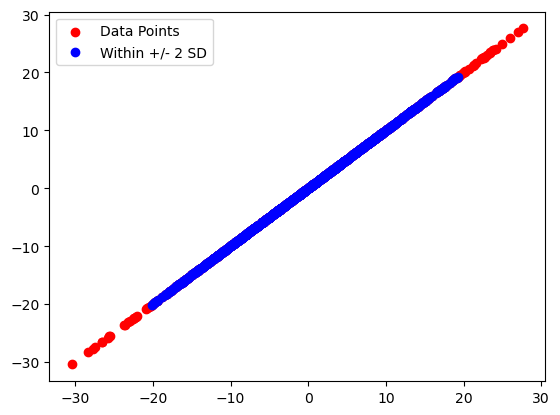

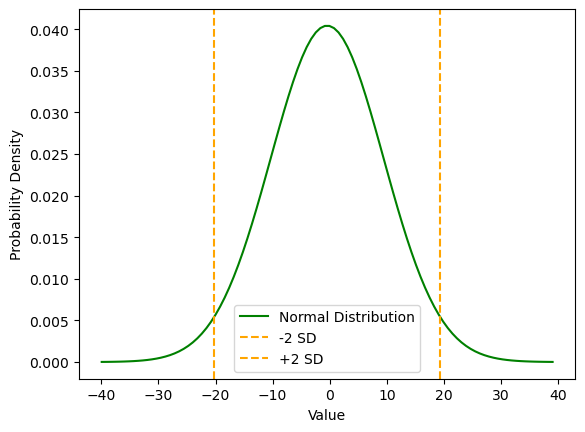

In [103]:
# Generate random data following a normal distribution
np.random.seed(0)
data = np.random.normal(0, 10, 1000)  # Mean=0, Standard deviation=10

# Calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Define the threshold for highlighting points
threshold = 2 * std

# Separate points within +/- 2 standard deviations
within_threshold = data[(data >= mean - threshold) & (data <= mean + threshold)]
outside_threshold = data[(data < mean - threshold) | (data > mean + threshold)]

plt.figure()
# Create scatter plot
plt.scatter(data, data, color='red', label='Data Points')
plt.scatter(within_threshold, within_threshold, color='blue', label='Within +/- 2 SD')
plt.legend()

plt.figure()
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, color='green', label='Normal Distribution')
plt.axvline(mean - threshold, color='orange', linestyle='--', label='-2 SD')
plt.axvline(mean + threshold, color='orange', linestyle='--', label='+2 SD')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Add legend and labels
# Display the plot
plt.show()